## PIMA Indian Diabetes Data - UCI
You can access the Diabetes Data and its relevant documentation [here on UCI website](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### Reading data with predefined column names

In [3]:
diabetes = pd.read_csv("processed_diabetes.csv")
diabetes.head()

,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Target
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


# Data Exploration

### Check summary statistics

In [4]:
diabetes.describe()

,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check if the data types are as expected

In [5]:
diabetes.dtypes

PregnantFreq           float64
PlasmaGlucose          float64
DiastolicBP            float64
TricepSkinThickness    float64
SerumInsulin           float64
BMI                    float64
DiabetesPedigree       float64
Age                      int64
Target                   int64
dtype: object

### Changing "Target" datatype

In [6]:
diabetes['Target'] = diabetes['Target'].astype('category')

In [7]:
diabetes.dtypes

PregnantFreq            float64
PlasmaGlucose           float64
DiastolicBP             float64
TricepSkinThickness     float64
SerumInsulin            float64
BMI                     float64
DiabetesPedigree        float64
Age                       int64
Target                 category
dtype: object

### Check target distribution

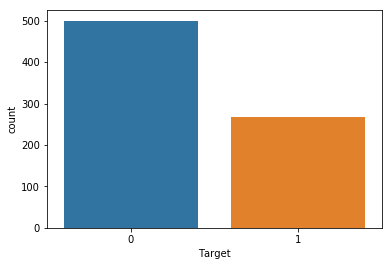

In [8]:
sns.countplot(diabetes['Target'])

**Important Take-Away** - *Transformations should be applied in a 2-phase strategy*

### Decouple traget from the features

In [9]:
# Select all columns except "Target"
X = diabetes[diabetes.columns.difference(['Target'])]
print(X.shape)
y = diabetes['Target']
print(y.shape)

(768, 8)
(768,)


### Test-Train split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print("--------------------------")
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (537, 8)
y_train (537,)
--------------------------
X_test (231, 8)
y_test (231,)


# Decision Trees

In [12]:
X_train.head()

,Age,BMI,DiabetesPedigree,DiastolicBP,PlasmaGlucose,PregnantFreq,SerumInsulin,TricepSkinThickness
334,22,23.9,0.260,60.0,95.0,1.0,58.0,18.0
139,28,36.9,0.159,72.0,105.0,5.0,325.0,29.0
485,24,42.3,0.365,68.0,135.0,0.0,250.0,42.0
547,28,33.1,0.160,68.0,131.0,4.0,166.0,21.0
18,33,43.3,0.183,30.0,103.0,1.0,83.0,38.0


### Model 1 - default parameters

In [15]:
from sklearn import tree
dt1_gini = tree.DecisionTreeClassifier()   ## Instantiating DecisionTree-Classifier
dt1_gini.fit(X_train, y_train)             ## Training Model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Checking accuracy

In [16]:
print('Train Accuracy =',dt1_gini.score(X_train, y_train))
print('Test Accuracy =',dt1_gini.score(X_test, y_test))

Train Accuracy = 1.0
Test Accuracy = 0.683982683982684


## Confusion Matrix and Classification Report

In [17]:
from sklearn.metrics import confusion_matrix
print("Train - Confusion Matrix")
print(confusion_matrix(y_train,dt1_gini.predict(X_train)))
print("--------------------------")
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,dt1_gini.predict(X_test)))

Train - Confusion Matrix
[[349   0]
 [  0 188]]
--------------------------
Test - Confusion Matrix
[[111  40]
 [ 33  47]]


## classification_report

In [19]:
from sklearn.metrics import classification_report
print("Train - Report")
print(classification_report(y_train,dt1_gini.predict(X_train)))
print("------------------------------------------------------------")
print("Test - Report")
print(classification_report(y_test,dt1_gini.predict(X_test)))

Train - Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       349
          1       1.00      1.00      1.00       188

avg / total       1.00      1.00      1.00       537

------------------------------------------------------------
Test - Report
             precision    recall  f1-score   support

          0       0.77      0.74      0.75       151
          1       0.54      0.59      0.56        80

avg / total       0.69      0.68      0.69       231



### Plotting the decision tree

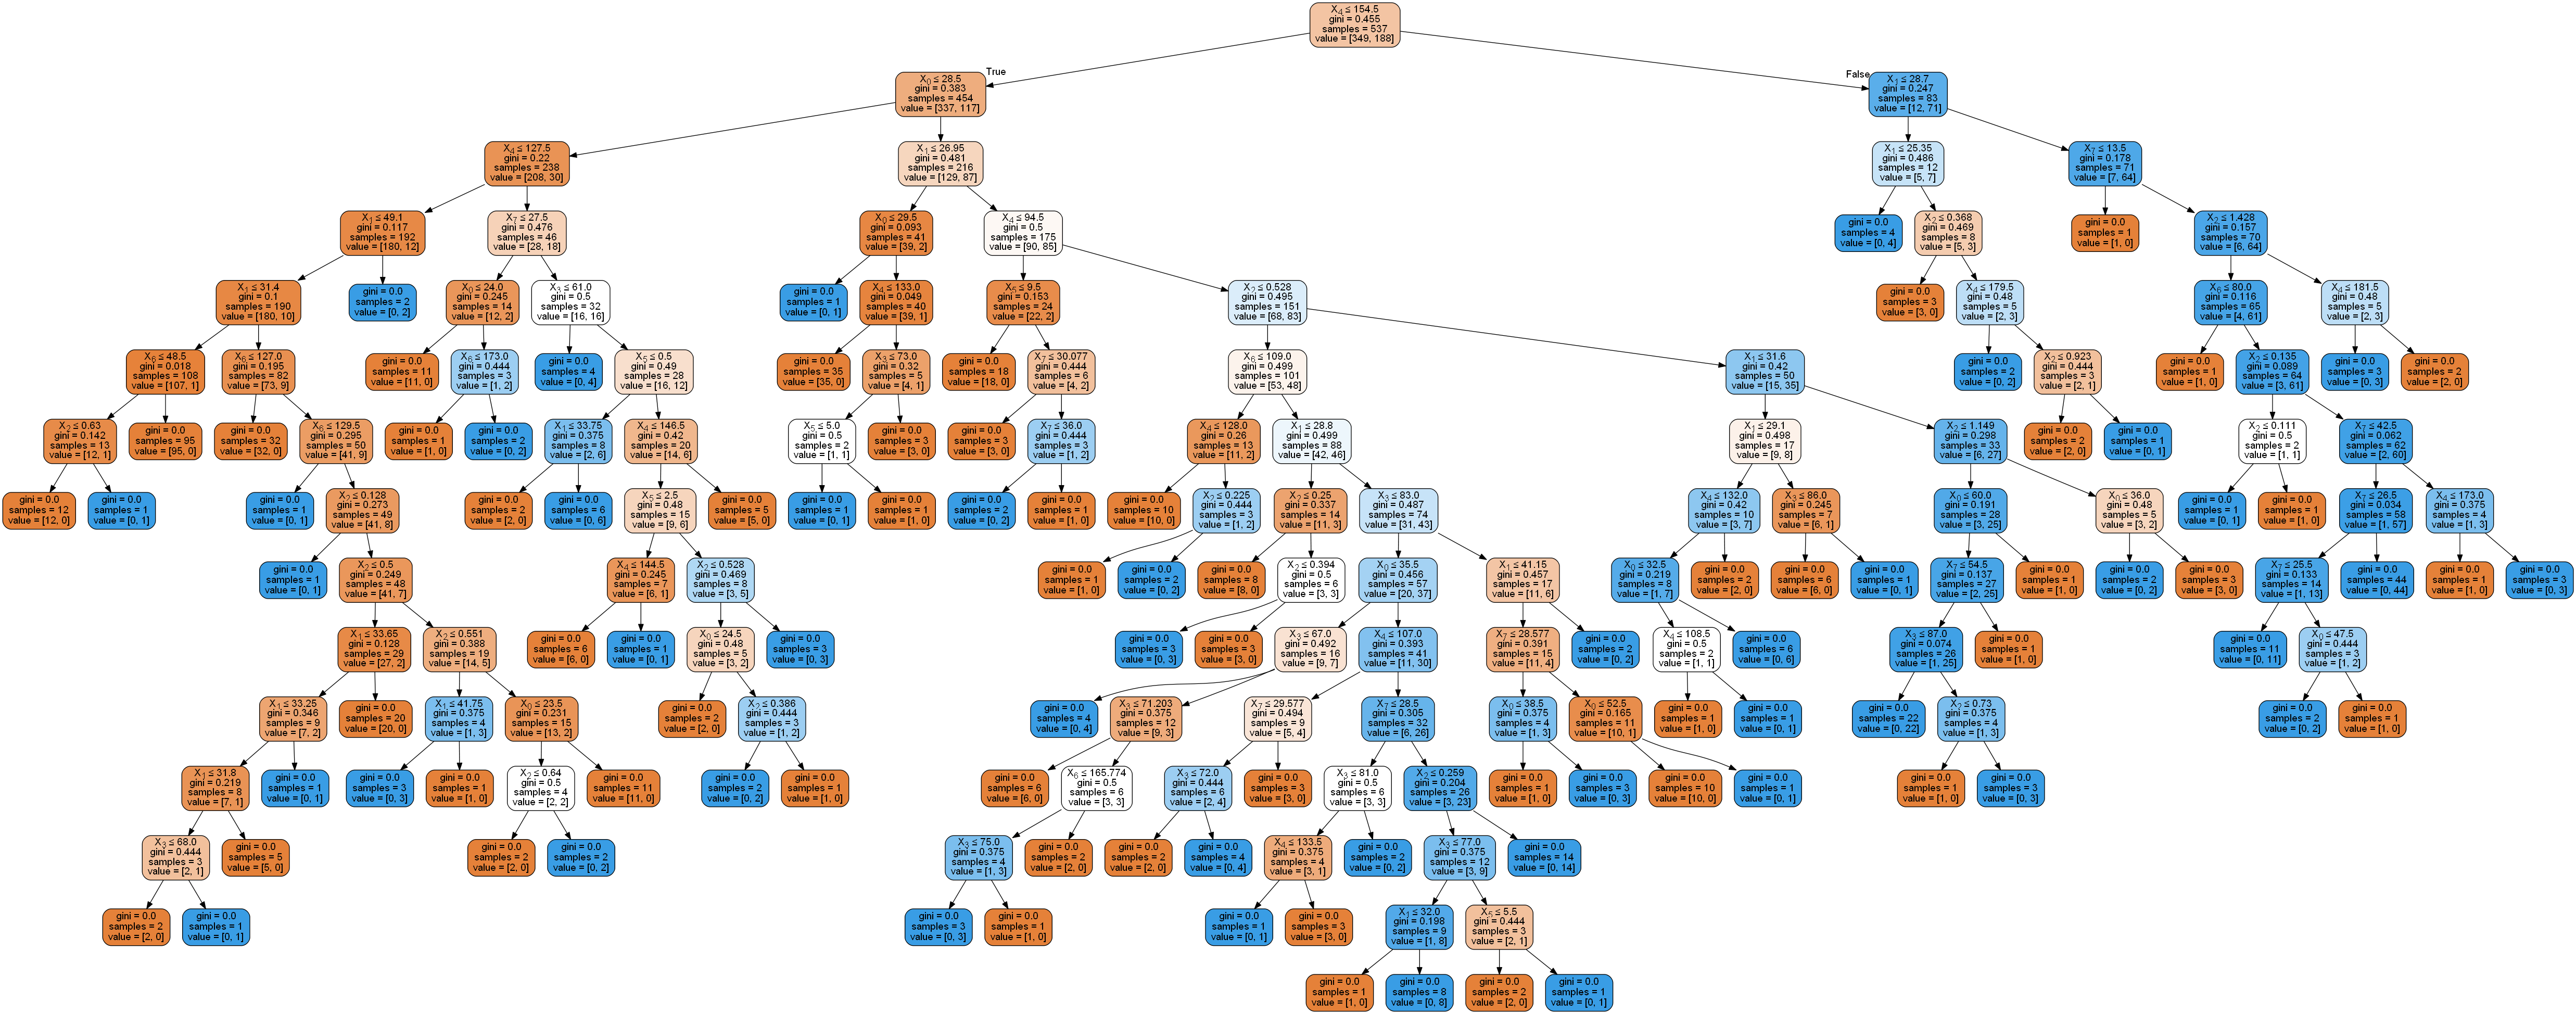

In [22]:
#import graphviz
#dot_data = tree.export_graphviz(dt1_gini, out_file=None, feature_names=X.columns, filled=True, rounded=True)
#graph = graphviz.Source(dot_data)
#graph.render("dt1_gini")

#          OR

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt1_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Any observations in the previous model? 

In [18]:
# Decision Tree is having too much depth and overfitting the train data, thus high variance, so can be reduced to less depth

# Model 2
1. Entropy based splits
2. Max tree depth = 5

In [23]:
dt2_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
dt2_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:

print('Train Accuracy =',dt2_entropy.score(X_train, y_train))
print('Test Accuracy =',dt2_entropy.score(X_test, y_test))

Train Accuracy = 0.8156424581005587
Test Accuracy = 0.7532467532467533


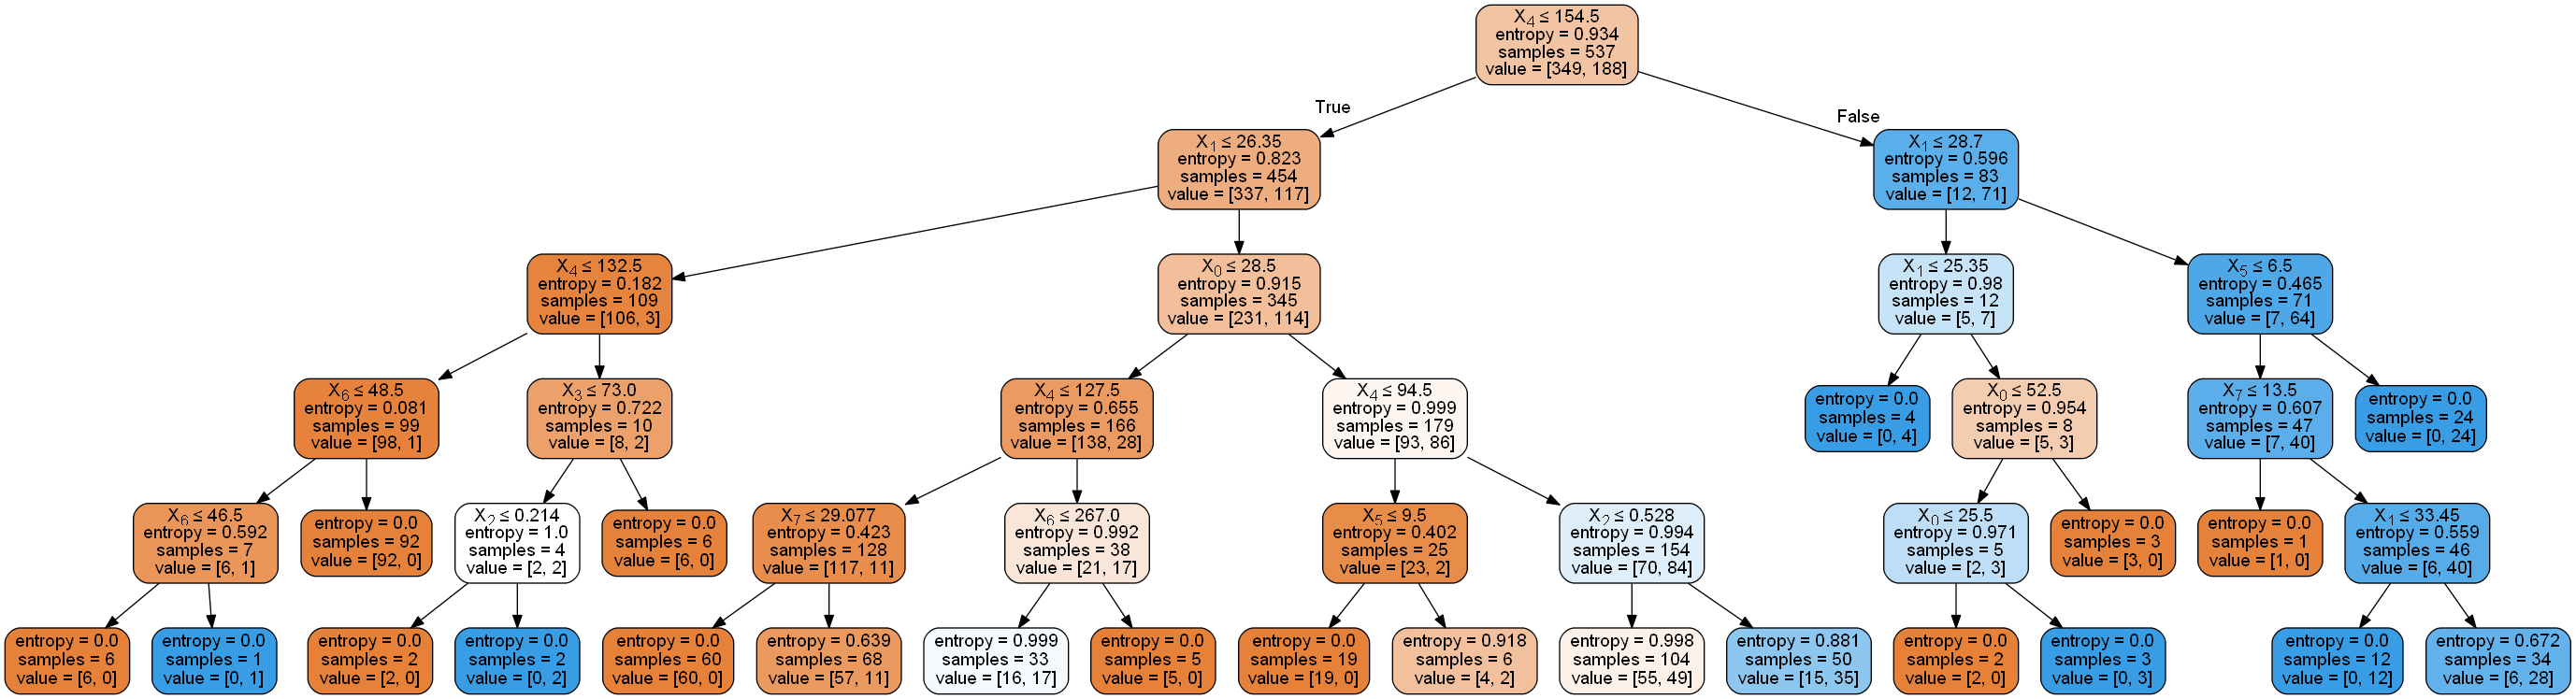

In [26]:
#dot_data = tree.export_graphviz(dt2_entropy, out_file=None,feature_names=X.columns,filled=True, rounded=True)
#graph = graphviz.Source(dot_data)
#graph.render("dt2_entropy_maxdept5")

#     OR

dot_data = StringIO()
export_graphviz(dt2_entropy, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Model 3
1. Entropy based splits
2. Max leaf nodes = 35
3. Minimum weight fraction at leaf node = 0.15

In [28]:
dt3_fraction15 = tree.DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.11)
dt3_fraction15.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.11, presort=False,
            random_state=None, splitter='best')

In [29]:
print('Train Accuracy =', dt3_fraction15.score(X_train, y_train))
print('Test Accuracy =', dt3_fraction15.score(X_test, y_test))

Train Accuracy = 0.7914338919925512
Test Accuracy = 0.7619047619047619


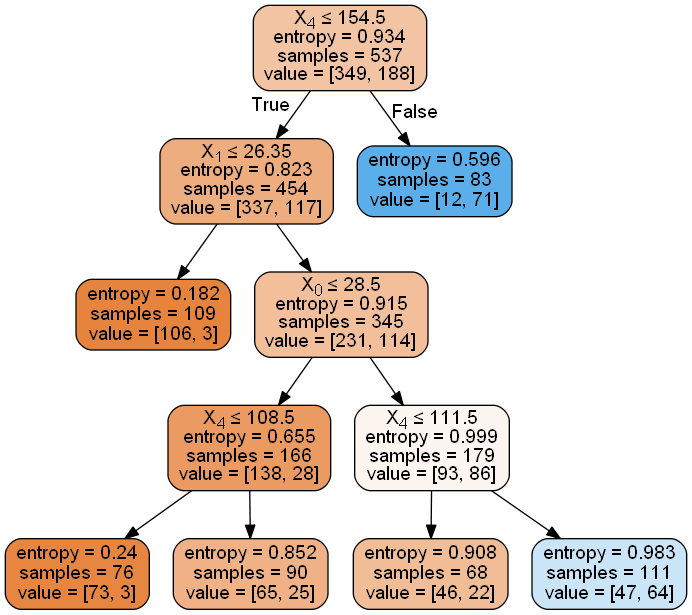

In [30]:
#dot_data = tree.export_graphviz(dt3_fraction15, out_file=None,feature_names=X.columns,filled=True, rounded=True)
#graph = graphviz.Source(dot_data)
#graph.render("dt3_fraction15")

# OR

dot_data = StringIO()
export_graphviz(dt3_fraction15, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Which model/parameters to choose for best accuracy?
### Will the model be really stable?

## Randomized Hyper-parameter search with cross-validation

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

dt = tree.DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_leaf_nodes': np.arange(5,30,1),
              'min_samples_split': np.arange(0.001,0.1,0.001),
              'max_depth': np.arange(5, 15, 1),
              'min_weight_fraction_leaf': np.arange(0.01,0.25,0.005)}

# Randomized Search Cross Validation returns an Object with best model parameters
rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=100, n_jobs=-1)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_leaf_nodes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]), 'min_samples_split': array([0.001, 0.002, ..., 0.098, 0.099]), 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, ...
       0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 ,
       0.235, 0.24 , 0.245])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', sco

In [47]:
print(rsearch.best_score_)
print(rsearch.best_estimator_)

0.770949720670391
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=21,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.066,
            min_weight_fraction_leaf=0.03, presort=False,
            random_state=None, splitter='best')


In [48]:
print('Train Accuracy', rsearch.best_score_)
print('Test Accuracy', rsearch.score(X_test, y_test))

Train Accuracy 0.770949720670391
Test Accuracy 0.7229437229437229


### Confusion Matrix

In [28]:
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, rsearch.predict(X_train)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, rsearch.predict(X_test)))

Train - Confusion Matrix
[[325  24]
 [ 71 117]]
-------------------------------------
Train - Confusion Matrix
[[124  27]
 [ 37  43]]


## **Optimizing for a spefic metric (Recall/Precision/F1)**

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
# Other matrices
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer

score_matrix = make_scorer(recall_score)
# score_matrix = make_scorer(precision_score)
# score_matrix = make_scorer(f1_score)

dt = tree.DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_leaf_nodes': np.arange(5,30,1),
              'min_samples_split': np.arange(0.001,0.1,0.001),
              'max_depth': np.arange(5,15,1),
              'min_weight_fraction_leaf': np.arange(0.01,0.25,0.005)}

# Randomized Search Cross Validation returns an Object with best model parameters
rsearch1 = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=100, scoring=score_matrix)
rsearch1.fit(X_train, y_train)
print(rsearch1.best_score_)
print(rsearch1.best_estimator_)
print('-------------------------------------')
print('Train Accuracy', rsearch1.best_score_)
print('Test Accuracy', rsearch1.score(X_test, y_test))

0.813744980982321
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=0.05,
            min_weight_fraction_leaf=0.019999999999999997, presort=False,
            random_state=None, splitter='best')
-------------------------------------
Train Accuracy 0.813744980982321
Test Accuracy 0.775


### Confusion Matrix

In [30]:
print('Train - Confusion Matrix')
print(confusion_matrix(y_train, rsearch1.predict(X_train)))
print('-------------------------------------')
print('Train - Confusion Matrix')
print(confusion_matrix(y_test, rsearch1.predict(X_test)))

# Returns the model with best Recall as score_matrix = Recall

Train - Confusion Matrix
[[267  82]
 [ 33 155]]
-------------------------------------
Train - Confusion Matrix
[[104  47]
 [ 18  62]]


### Making predictions

In [20]:
# Predict for Train
train_predicted= pd.DataFrame(dt3_fraction15.predict(X_train))
print(train_predicted.size)

# Predict for Test
#test_predicted= pd.DataFrame(dt3_fraction15.predict(X_test))
#print(test_predicted.size)

# Then combine Train and Test prediction, and then assign to the actual predicted
#predicted = rbind(train_predicted, test_predicted)
#print(test_predicted.size)

diabetes['Predicted'] = predicted

In [ ]:
# Export to csv file
diabetes.to_csv("diabetes_predictions.csv")